In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df.shape

(150, 5)

In [9]:
x=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y=df['species']

In [10]:
ls=LabelEncoder()
y=ls.fit_transform(y)

In [11]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [15]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,Y_train)
pred = naive_bayes.predict(X_test)

In [16]:
print(pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


In [18]:
print(accuracy_score(Y_test,pred))

1.0


In [19]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [21]:
matrix = confusion_matrix(Y_test,pred,labels=naive_bayes.classes_)
print(matrix)

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]


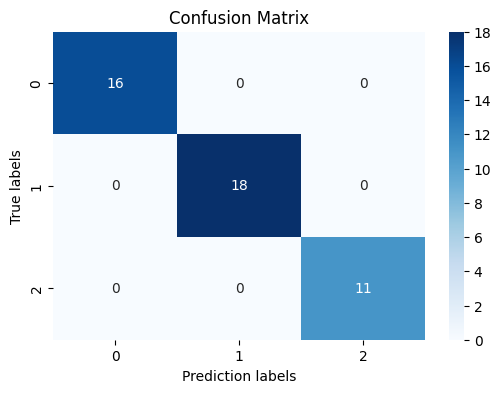

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(matrix, annot=True, cmap='Blues')

plt.xlabel('Prediction labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [35]:
tp, fn, fp, tn = confusion_matrix(Y_test, pred, labels=[1,0]).reshape(-1)

In [36]:
print('Error rate', ((fp+fn)/(tp+tn+fp+fn)))

Error rate 0.0
